# Tariff Shield: A Geopolitical Risk & Supply Chain Optimization

## Data Collection

In [96]:
import sys
!{sys.executable} -m pip install --upgrade comtradeapicall

In [7]:
import sys
!{sys.executable} -m pip install pandas

In [97]:
import requests
import pandas as pd
import time
import comtradeapicall

In [98]:
# Your API credentials
API_KEY = <API_KEY>

years = ["2020", "2021", "2022", "2023"]
product = "8517,6109,8708"               # multiple commodities in one call
countries = "156,704,484,410,50"         # multiple partners (China=156, Vietnam=704, Mexico=484, Korea=410, Bangladesh=50)

In [120]:
all_data = []

for year in years:
    data = comtradeapicall.getFinalData(
        API_KEY,
        typeCode='C',
        freqCode='A',
        clCode='HS',
        period=year,
        reporterCode='842',   # USA
        cmdCode=product,
        flowCode='M',         # Imports
        partnerCode=countries,
        partner2Code="",
        customsCode="",
        motCode="",
        includeDesc=True
    )

    # Only append if data exists
    if data is not None and not data.empty:
        data['year'] = year
        all_data.append(data)
        print(f"Fetched {year}")
    else:
        print(f"No data found for {year}")

# Combine results
if all_data:
    tradeData = pd.concat(all_data, ignore_index=True)
    tradeData.to_csv("tradeData.csv", index=False)
    print(tradeData.head())
else:
    print("No data retrieved")

Fetched 2020
Fetched 2021
Fetched 2022
Fetched 2023
  typeCode freqCode  refPeriodId  refYear  refMonth period  reporterCode  \
0        C        A     20200101     2020        52   2020           842   
1        C        A     20200101     2020        52   2020           842   
2        C        A     20200101     2020        52   2020           842   
3        C        A     20200101     2020        52   2020           842   
4        C        A     20200101     2020        52   2020           842   

  reporterISO reporterDesc flowCode  ... isNetWgtEstimated  grossWgt  \
0         USA          USA        M  ...             False       0.0   
1         USA          USA        M  ...             False       0.0   
2         USA          USA        M  ...             False       0.0   
3         USA          USA        M  ...             False       0.0   
4         USA          USA        M  ...             False       0.0   

  isGrossWgtEstimated     cifvalue  fobvalue primaryValue 

In [121]:
tradeData.info()
tradeData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  59 non-null     object 
 1   freqCode                  59 non-null     object 
 2   refPeriodId               59 non-null     int64  
 3   refYear                   59 non-null     int64  
 4   refMonth                  59 non-null     int64  
 5   period                    59 non-null     object 
 6   reporterCode              59 non-null     int64  
 7   reporterISO               59 non-null     object 
 8   reporterDesc              59 non-null     object 
 9   flowCode                  59 non-null     object 
 10  flowDesc                  59 non-null     object 
 11  partnerCode               59 non-null     int64  
 12  partnerISO                59 non-null     object 
 13  partnerDesc               59 non-null     object 
 14  partner2Code

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate,year
0,C,A,20200101,2020,52,2020,842,USA,USA,M,...,False,0.0,False,380199389.0,0.0,380199389.0,0,False,True,2020
1,C,A,20200101,2020,52,2020,842,USA,USA,M,...,False,0.0,False,5147532.0,0.0,5147532.0,0,False,True,2020
2,C,A,20200101,2020,52,2020,842,USA,USA,M,...,False,0.0,False,396595721.0,0.0,396595721.0,0,False,True,2020
3,C,A,20200101,2020,52,2020,842,USA,USA,M,...,False,0.0,False,265360188.0,0.0,265360188.0,0,False,True,2020
4,C,A,20200101,2020,52,2020,842,USA,USA,M,...,False,0.0,False,462417335.0,0.0,462417335.0,0,False,True,2020


In [37]:
!pip install wbdata


  Attempting uninstall: pytz

    Found existing installation: pytz 2024.1

   ---------------------------------------- 0/7 [pytz]
   ---------------------------------------- 0/7 [pytz]
   ---------------------------------------- 0/7 [pytz]
   ---------------------------------------- 0/7 [pytz]
    Uninstalling pytz-2024.1:
   ---------------------------------------- 0/7 [pytz]
      Successfully uninstalled pytz-2024.1
   ---------------------------------------- 0/7 [pytz]
   ---------------------------------------- 0/7 [pytz]
   ---------------------------------------- 0/7 [pytz]
   ---------------------------------------- 0/7 [pytz]
   ---------------------------------------- 0/7 [pytz]
   ---------------------------------------- 0/7 [pytz]
   ---------------------------------------- 0/7 [pytz]
   ---------------------------------------- 0/7 [pytz]
   ---------------------------------------- 0/7 [pytz]
   ---------------------------------------- 0/7 [pytz]
   ----------------------

In [101]:
import wbdata
import datetime

countriesISO = ['CN', 'VN', 'MX', 'KOR', 'BD']  # ISO codes

# Key economic indicators
indicators = {
    'NY.GDP.PCAP.CD': 'gdp_per_capita',
    'SL.UEM.TOTL.ZS': 'unemployment_rate',
    'FP.CPI.TOTL.ZG': 'inflation_rate',
    'PA.NUS.FCRF': 'exchange_rate'
}

# Set date range (datetime objects)
date_range = (datetime.datetime(2020, 1, 1), datetime.datetime(2023, 12, 31))

# Fetch data using correct argument 'date'
economic_data = wbdata.get_dataframe(
    indicators,
    country=countriesISO,
    date=date_range
)

# Check and save
if not economic_data.empty:
    economic_data = economic_data.reset_index()  # Makes country and date columns
    economic_data.to_csv('economic_indicators.csv', index=False)
    print("Economic data downloaded")
else:
    print("Failed to download economic data")


Economic data downloaded


In [102]:
economic_data.info()
economic_data.head()

<class 'wbdata.client.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            20 non-null     object 
 1   date               20 non-null     object 
 2   gdp_per_capita     20 non-null     float64
 3   unemployment_rate  20 non-null     float64
 4   inflation_rate     20 non-null     float64
 5   exchange_rate      20 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


,country,date,gdp_per_capita,unemployment_rate,inflation_rate,exchange_rate
0,Bangladesh,2023,2551.017738,4.454,9.883503,106.309484
1,Bangladesh,2022,2716.485928,4.593,7.696954,91.745454
2,Bangladesh,2021,2482.849178,5.327,5.545654,85.083763
3,Bangladesh,2020,2248.850788,5.436,5.691075,84.871392
4,China,2023,12951.178240,4.670,0.234837,7.083998


In [103]:
#Read Tariff Data downloaded from WITS
tariffData = pd.read_csv("TariffData.csv")
tariffData.info()
tariffData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Selected Nomen             59 non-null     object 
 1   Native Nomen               59 non-null     object 
 2   Reporter                   59 non-null     int64  
 3   Reporter Name              59 non-null     object 
 4   Product                    59 non-null     int64  
 5   Partner                    59 non-null     int64  
 6   Partner Name               59 non-null     object 
 7   Tariff Year                59 non-null     int64  
 8   Trade Year                 59 non-null     int64  
 9   Trade Source               59 non-null     object 
 10  Duty Type                  59 non-null     object 
 11  Simple Average             59 non-null     float64
 12  Weighted Average           59 non-null     float64
 13  Standard Deviation         59 non-null     float64
 

,Selected Nomen,Native Nomen,Reporter,Reporter Name,Product,Partner,Partner Name,Tariff Year,Trade Year,Trade Source,...,Simple Average,Weighted Average,Standard Deviation,Minimum Rate,Maximum Rate,Nbr of Total Lines,Nbr of DomesticPeaks,Nbr of InternationalPeaks,Imports Value in 1000 USD,Binding Coverage
0,HS,H5,840,United States,6109,50,Bangladesh,2020,2020,CMT,...,15.27,16.29,10.33,2.6,32.0,5,3,3,"2,65,360.19",NaN
1,HS,H5,840,United States,6109,50,Bangladesh,2021,2021,CMT,...,15.27,16.28,10.33,2.6,32.0,5,3,3,"5,04,477.28",NaN
2,HS,H5,840,United States,6109,156,China,2020,2020,CMT,...,15.27,15.41,10.33,2.6,32.0,5,3,3,"4,62,417.34",NaN
3,HS,H5,840,United States,6109,156,China,2021,2021,CMT,...,15.27,15.36,10.33,2.6,32.0,5,3,3,"6,95,121.47",NaN
4,HS,H5,840,United States,6109,410,"Korea, Rep.",2020,2020,CMT,...,15.27,15.50,10.33,2.6,32.0,5,3,3,"5,147.53",NaN


## Exploratory Data Analysis

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Clean TradeData

In [104]:
tradeData.shape

(59, 48)

In [122]:
# Select important columns (reduce noise)
tradeDf = tradeData[[
    "year", "reporterISO", "reporterDesc", 
    "partnerISO", "partnerDesc", 
    "cmdCode", "cmdDesc", 
    "flowDesc", "qty", "netWgt", 
    "cifvalue", "fobvalue", "primaryValue"
]]

tradeDf = pd.DataFrame(tradeDf)
tradeDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          59 non-null     object 
 1   reporterISO   59 non-null     object 
 2   reporterDesc  59 non-null     object 
 3   partnerISO    59 non-null     object 
 4   partnerDesc   59 non-null     object 
 5   cmdCode       59 non-null     object 
 6   cmdDesc       59 non-null     object 
 7   flowDesc      59 non-null     object 
 8   qty           59 non-null     float64
 9   netWgt        59 non-null     float64
 10  cifvalue      59 non-null     float64
 11  fobvalue      59 non-null     float64
 12  primaryValue  59 non-null     float64
dtypes: float64(5), object(8)
memory usage: 6.1+ KB


In [123]:
tradeDf.head()

,year,reporterISO,reporterDesc,partnerISO,partnerDesc,cmdCode,cmdDesc,flowDesc,qty,netWgt,cifvalue,fobvalue,primaryValue
0,2020,USA,USA,VNM,Viet Nam,6109,"T-shirts, singlets and other vests; knitted or...",Import,134356608.0,21760312.0,380199389.0,0.0,380199389.0
1,2020,USA,USA,KOR,Rep. of Korea,6109,"T-shirts, singlets and other vests; knitted or...",Import,968388.0,176810.0,5147532.0,0.0,5147532.0
2,2020,USA,USA,MEX,Mexico,6109,"T-shirts, singlets and other vests; knitted or...",Import,181811472.0,31601866.0,396595721.0,0.0,396595721.0
3,2020,USA,USA,BGD,Bangladesh,6109,"T-shirts, singlets and other vests; knitted or...",Import,164275800.0,27615748.0,265360188.0,0.0,265360188.0
4,2020,USA,USA,CHN,China,6109,"T-shirts, singlets and other vests; knitted or...",Import,268204548.0,50283977.0,462417335.0,0.0,462417335.0


In [107]:
# Convert year data type to numeric
tradeDf["year"] = pd.to_numeric(tradeDf["year"], errors="coerce")

tradeDf.info()
tradeDf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          59 non-null     int64  
 1   reporterISO   59 non-null     object 
 2   reporterDesc  59 non-null     object 
 3   partnerISO    59 non-null     object 
 4   partnerDesc   59 non-null     object 
 5   cmdCode       59 non-null     object 
 6   cmdDesc       59 non-null     object 
 7   flowDesc      59 non-null     object 
 8   qty           59 non-null     float64
 9   netWgt        59 non-null     float64
 10  cifvalue      59 non-null     float64
 11  fobvalue      59 non-null     float64
 12  primaryValue  59 non-null     float64
dtypes: float64(5), int64(1), object(7)
memory usage: 6.1+ KB


,year,reporterISO,reporterDesc,partnerISO,partnerDesc,cmdCode,cmdDesc,flowDesc,qty,netWgt,cifvalue,fobvalue,primaryValue
0,2020,USA,USA,VNM,Viet Nam,6109,"T-shirts, singlets and other vests; knitted or...",Import,134356608.0,21760312.0,380199389.0,0.0,380199389.0
1,2020,USA,USA,KOR,Rep. of Korea,6109,"T-shirts, singlets and other vests; knitted or...",Import,968388.0,176810.0,5147532.0,0.0,5147532.0
2,2020,USA,USA,MEX,Mexico,6109,"T-shirts, singlets and other vests; knitted or...",Import,181811472.0,31601866.0,396595721.0,0.0,396595721.0
3,2020,USA,USA,BGD,Bangladesh,6109,"T-shirts, singlets and other vests; knitted or...",Import,164275800.0,27615748.0,265360188.0,0.0,265360188.0
4,2020,USA,USA,CHN,China,6109,"T-shirts, singlets and other vests; knitted or...",Import,268204548.0,50283977.0,462417335.0,0.0,462417335.0


In [124]:
tradeDf.isnull().sum()

year            0
reporterISO     0
reporterDesc    0
partnerISO      0
partnerDesc     0
cmdCode         0
cmdDesc         0
flowDesc        0
qty             0
netWgt          0
cifvalue        0
fobvalue        0
primaryValue    0
dtype: int64

In [125]:
# Drop duplicates
tradeDf.drop_duplicates(inplace=True)

In [126]:
tradeDf.shape

(59, 13)

In [127]:
# Handle negative/zero values in trade columns
for col in ["cifvalue", "fobvalue", "primaryValue", "qty", "netWgt"]:
    tradeDf[col] = tradeDf[col].apply(lambda x: np.nan if x < 0 else x)

In [128]:
tradeDf.describe(include="all")

,year,reporterISO,reporterDesc,partnerISO,partnerDesc,cmdCode,cmdDesc,flowDesc,qty,netWgt,cifvalue,fobvalue,primaryValue
count,59,59,59,59,59,59,59,59,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01
unique,4,1,1,5,5,3,4,1,NaN,NaN,NaN,NaN,NaN
top,2020,USA,USA,VNM,Viet Nam,6109,"T-shirts, singlets and other vests; knitted or...",Import,NaN,NaN,NaN,NaN,NaN
freq,15,59,59,12,12,20,20,59,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.247451e+08,2.895631e+08,9.162624e+09,4.865292e+09,9.162624e+09
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.145331e+08,6.204762e+08,1.590467e+10,1.257972e+10,1.590467e+10
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.668970e+02,5.608000e+03,0.000000e+00,5.608000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.382574e+07,4.032001e+08,0.000000e+00,4.032001e+08
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.261749e+07,4.484896e+07,7.075777e+08,6.105900e+04,7.075777e+08
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.199381e+08,1.210972e+08,1.010919e+10,6.827263e+08,1.010919e+10


In [129]:
tradeDf["partnerDesc"] = tradeDf["partnerDesc"].replace("Rep. of Korea", "Korea, Rep.")
tradeDf

,year,reporterISO,reporterDesc,partnerISO,partnerDesc,cmdCode,cmdDesc,flowDesc,qty,netWgt,cifvalue,fobvalue,primaryValue
0,2020,USA,USA,VNM,Viet Nam,6109,"T-shirts, singlets and other vests; knitted or...",Import,1.343566e+08,2.176031e+07,3.801994e+08,0.000000e+00,3.801994e+08
1,2020,USA,USA,KOR,"Korea, Rep.",6109,"T-shirts, singlets and other vests; knitted or...",Import,9.683880e+05,1.768100e+05,5.147532e+06,0.000000e+00,5.147532e+06
2,2020,USA,USA,MEX,Mexico,6109,"T-shirts, singlets and other vests; knitted or...",Import,1.818115e+08,3.160187e+07,3.965957e+08,0.000000e+00,3.965957e+08
3,2020,USA,USA,BGD,Bangladesh,6109,"T-shirts, singlets and other vests; knitted or...",Import,1.642758e+08,2.761575e+07,2.653602e+08,0.000000e+00,2.653602e+08
4,2020,USA,USA,CHN,China,6109,"T-shirts, singlets and other vests; knitted or...",Import,2.682045e+08,5.028398e+07,4.624173e+08,0.000000e+00,4.624173e+08
5,2020,USA,USA,MEX,Mexico,8708,"Motor vehicles; parts and accessories, of head...",Import,1.833091e+09,1.833091e+09,2.248777e+10,0.000000e+00,2.248777e+10
6,2020,USA,USA,BGD,Bangladesh,8708,"Motor vehicles; parts and accessories, of head...",Import,4.114450e+02,4.114450e+02,5.608000e+03,0.000000e+00,5.608000e+03
7,2020,USA,USA,VNM,Viet Nam,8708,"Motor vehicles; parts and accessories, of head...",Import,2.181946e+07,2.181946e+07,2.534661e+08,0.000000e+00,2.534661e+08
8,2020,USA,USA,KOR,"Korea, Rep.",8708,"Motor vehicles; parts and accessories, of head...",Import,3.373618e+08,3.373618e+08,3.977665e+09,0.000000e+00,3.977665e+09
9,2020,USA,USA,CHN,China,8708,"Motor vehicles; parts and accessories, of head...",Import,8.853582e+08,8.853582e+08,8.113237e+09,0.000000e+00,8.113237e+09


In [130]:
tradeDf.to_csv("final_trade_data.csv", index=False)

##### Visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
trade = pd.read_csv("final_trade_data.csv")
# 1. Trade Value Trend over Years
plt.figure(figsize=(10,5))
trade.groupby("year")["cifvalue"].sum().plot(kind="line", marker="o")
plt.title("Total Import (CIF Value) Trend by Year")
plt.ylabel("CIF Value (USD)")
plt.show()

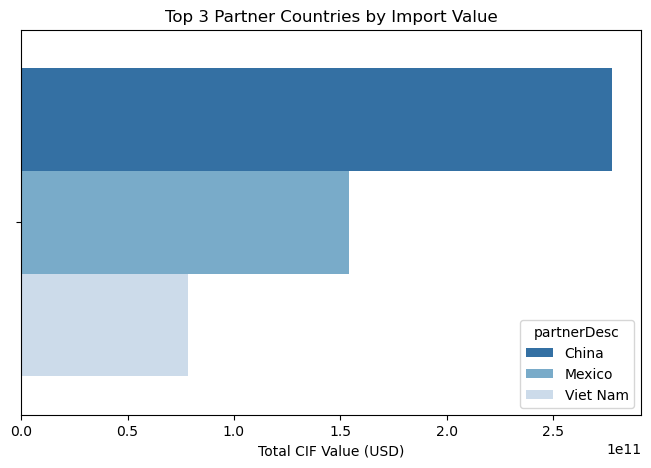

In [41]:
# 2. Top 3 Partner Countries by Import Value
top_partners = (trade.groupby("partnerDesc")["cifvalue"]
                .sum()
                .sort_values(ascending=False)
                .head(3))
plt.figure(figsize=(8,5))
sns.barplot(x=top_partners.values, hue=top_partners.index, palette="Blues_r")
plt.title("Top 3 Partner Countries by Import Value")
plt.xlabel("Total CIF Value (USD)")
plt.show()

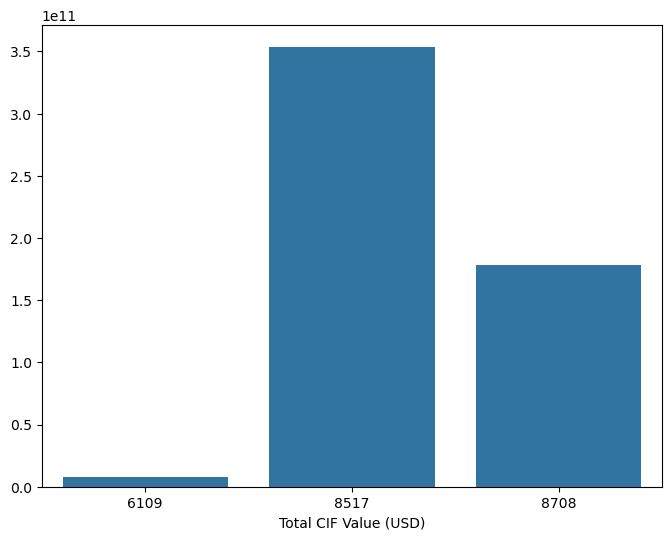

In [115]:
# 3. Product-wise Import Distribution
top_products = (trade.groupby("cmdCode")["cifvalue"]
                .sum()
                .sort_values(ascending=False))
plt.figure(figsize=(8,6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xlabel("Total CIF Value (USD)")
plt.show()

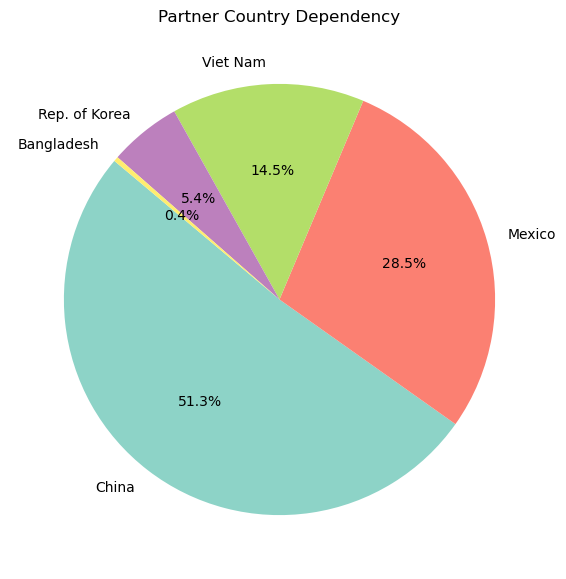

In [49]:
# 4. Partner Concentration (Dependency)
partner_share = (trade.groupby("partnerDesc")["cifvalue"].sum() /
                 trade["cifvalue"].sum()) * 100
partner_share = partner_share.sort_values(ascending=False)

plt.figure(figsize=(7,7))
partner_share.plot(kind="pie", autopct='%1.1f%%', startangle=140, cmap="Set3")
plt.title("Partner Country Dependency")
plt.ylabel("")
plt.show()

### Clean tariffData

In [116]:
tariffData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Selected Nomen             59 non-null     object 
 1   Native Nomen               59 non-null     object 
 2   Reporter                   59 non-null     int64  
 3   Reporter Name              59 non-null     object 
 4   Product                    59 non-null     int64  
 5   Partner                    59 non-null     int64  
 6   Partner Name               59 non-null     object 
 7   Tariff Year                59 non-null     int64  
 8   Trade Year                 59 non-null     int64  
 9   Trade Source               59 non-null     object 
 10  Duty Type                  59 non-null     object 
 11  Simple Average             59 non-null     float64
 12  Weighted Average           59 non-null     float64
 13  Standard Deviation         59 non-null     float64
 

In [117]:
tariffData.head()

,Selected Nomen,Native Nomen,Reporter,Reporter Name,Product,Partner,Partner Name,Tariff Year,Trade Year,Trade Source,...,Simple Average,Weighted Average,Standard Deviation,Minimum Rate,Maximum Rate,Nbr of Total Lines,Nbr of DomesticPeaks,Nbr of InternationalPeaks,Imports Value in 1000 USD,Binding Coverage
0,HS,H5,840,United States,6109,50,Bangladesh,2020,2020,CMT,...,15.27,16.29,10.33,2.6,32.0,5,3,3,"2,65,360.19",NaN
1,HS,H5,840,United States,6109,50,Bangladesh,2021,2021,CMT,...,15.27,16.28,10.33,2.6,32.0,5,3,3,"5,04,477.28",NaN
2,HS,H5,840,United States,6109,156,China,2020,2020,CMT,...,15.27,15.41,10.33,2.6,32.0,5,3,3,"4,62,417.34",NaN
3,HS,H5,840,United States,6109,156,China,2021,2021,CMT,...,15.27,15.36,10.33,2.6,32.0,5,3,3,"6,95,121.47",NaN
4,HS,H5,840,United States,6109,410,"Korea, Rep.",2020,2020,CMT,...,15.27,15.50,10.33,2.6,32.0,5,3,3,"5,147.53",NaN


In [118]:
# Drop Binding Coverage (all nulls)
tariffDf = tariffData.drop(columns=["Binding Coverage"])
tariffDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Selected Nomen             59 non-null     object 
 1   Native Nomen               59 non-null     object 
 2   Reporter                   59 non-null     int64  
 3   Reporter Name              59 non-null     object 
 4   Product                    59 non-null     int64  
 5   Partner                    59 non-null     int64  
 6   Partner Name               59 non-null     object 
 7   Tariff Year                59 non-null     int64  
 8   Trade Year                 59 non-null     int64  
 9   Trade Source               59 non-null     object 
 10  Duty Type                  59 non-null     object 
 11  Simple Average             59 non-null     float64
 12  Weighted Average           59 non-null     float64
 13  Standard Deviation         59 non-null     float64
 

In [119]:
# Convert Imports Value to numeric
tariffDf["Imports Value in 1000 USD"] = (
    tariffDf["Imports Value in 1000 USD"]
    .replace(",", "", regex=True)
    .astype(float)
)

# Convert year columns are integer
tariffDf["Tariff Year"] = pd.to_numeric(tariffDf["Tariff Year"], errors="coerce")
tariffDf["Trade Year"] = pd.to_numeric(tariffDf["Trade Year"], errors="coerce")

tariffDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Selected Nomen             59 non-null     object 
 1   Native Nomen               59 non-null     object 
 2   Reporter                   59 non-null     int64  
 3   Reporter Name              59 non-null     object 
 4   Product                    59 non-null     int64  
 5   Partner                    59 non-null     int64  
 6   Partner Name               59 non-null     object 
 7   Tariff Year                59 non-null     int64  
 8   Trade Year                 59 non-null     int64  
 9   Trade Source               59 non-null     object 
 10  Duty Type                  59 non-null     object 
 11  Simple Average             59 non-null     float64
 12  Weighted Average           59 non-null     float64
 13  Standard Deviation         59 non-null     float64
 

In [131]:
tariffDf["Partner Name"] = tariffDf["Partner Name"].replace("Vietnam", "Viet Nam")
tariffDf

,Selected Nomen,Native Nomen,Reporter,Reporter Name,Product,Partner,Partner Name,Tariff Year,Trade Year,Trade Source,Duty Type,Simple Average,Weighted Average,Standard Deviation,Minimum Rate,Maximum Rate,Nbr of Total Lines,Nbr of DomesticPeaks,Nbr of InternationalPeaks,Imports Value in 1000 USD
0,HS,H5,840,United States,6109,50,Bangladesh,2020,2020,CMT,MFN,15.27,16.29,10.33,2.6,32.0,5,3,3,2.653602e+05
1,HS,H5,840,United States,6109,50,Bangladesh,2021,2021,CMT,MFN,15.27,16.28,10.33,2.6,32.0,5,3,3,5.044773e+05
2,HS,H5,840,United States,6109,156,China,2020,2020,CMT,MFN,15.27,15.41,10.33,2.6,32.0,5,3,3,4.624173e+05
3,HS,H5,840,United States,6109,156,China,2021,2021,CMT,MFN,15.27,15.36,10.33,2.6,32.0,5,3,3,6.951215e+05
4,HS,H5,840,United States,6109,410,"Korea, Rep.",2020,2020,CMT,MFN,15.27,15.50,10.33,2.6,32.0,5,3,3,5.147530e+03
5,HS,H5,840,United States,6109,410,"Korea, Rep.",2021,2021,CMT,MFN,15.27,15.43,10.33,2.6,32.0,5,3,3,9.473320e+03
6,HS,H5,840,United States,6109,484,Mexico,2020,2020,CMT,MFN,15.27,15.61,10.33,2.6,32.0,5,3,3,3.965957e+05
7,HS,H5,840,United States,6109,484,Mexico,2021,2021,CMT,MFN,15.27,15.61,10.33,2.6,32.0,5,3,3,5.223402e+05
8,HS,H5,840,United States,6109,704,Viet Nam,2020,2020,CMT,MFN,15.27,15.78,10.33,2.6,32.0,5,3,3,3.801994e+05
9,HS,H5,840,United States,6109,704,Viet Nam,2021,2021,CMT,MFN,15.27,15.80,10.33,2.6,32.0,5,3,3,4.755779e+05


In [133]:
tariffDf.to_csv("final_tariff_data.csv", index=False)

#### Visualization

<Figure size 1000x500 with 0 Axes>

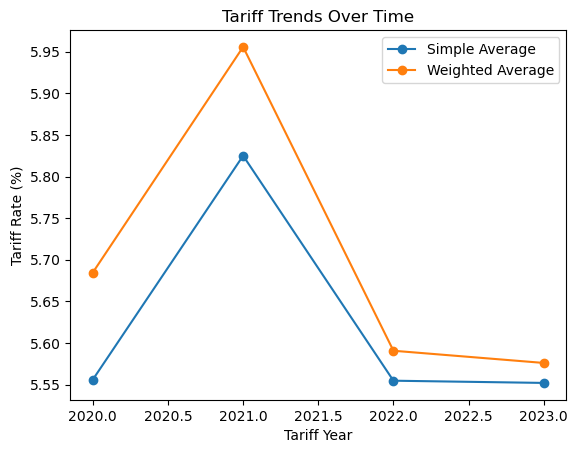

In [50]:
tariff = pd.read_csv("final_tariff_data.csv")
# 1. Tariff Trends over Years
plt.figure(figsize=(10,5))
tariff.groupby("Tariff Year")[["Simple Average", "Weighted Average"]].mean().plot(marker="o")
plt.title("Tariff Trends Over Time")
plt.ylabel("Tariff Rate (%)")
plt.show()

6109
8517
8708


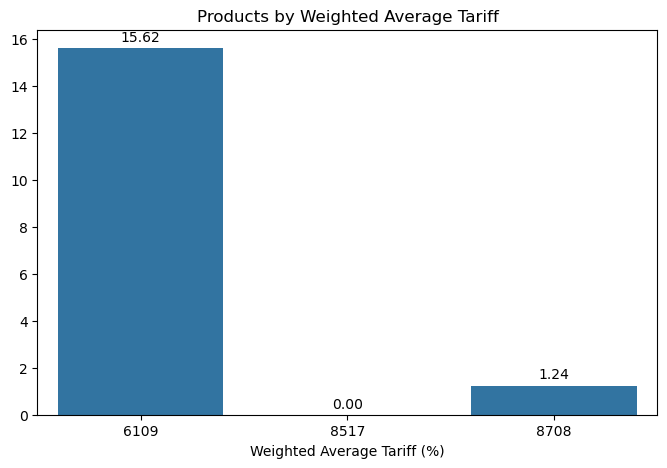

In [69]:
# 2. Products with Highest Weighted Average Tariff
top_products = (tariff.groupby("Product")["Weighted Average"]
                .mean())
plt.figure(figsize=(8,5))
sns.barplot(x=top_products.index, y=top_products.values)
for i, v in enumerate(top_products.values):
    plt.text(i, v + max(top_products.values)*.01, f"{v:,.2f}", ha='center', va='bottom')
plt.title("Products by Weighted Average Tariff")
plt.xlabel("Weighted Average Tariff (%)")
plt.show()

<Figure size 1200x600 with 0 Axes>

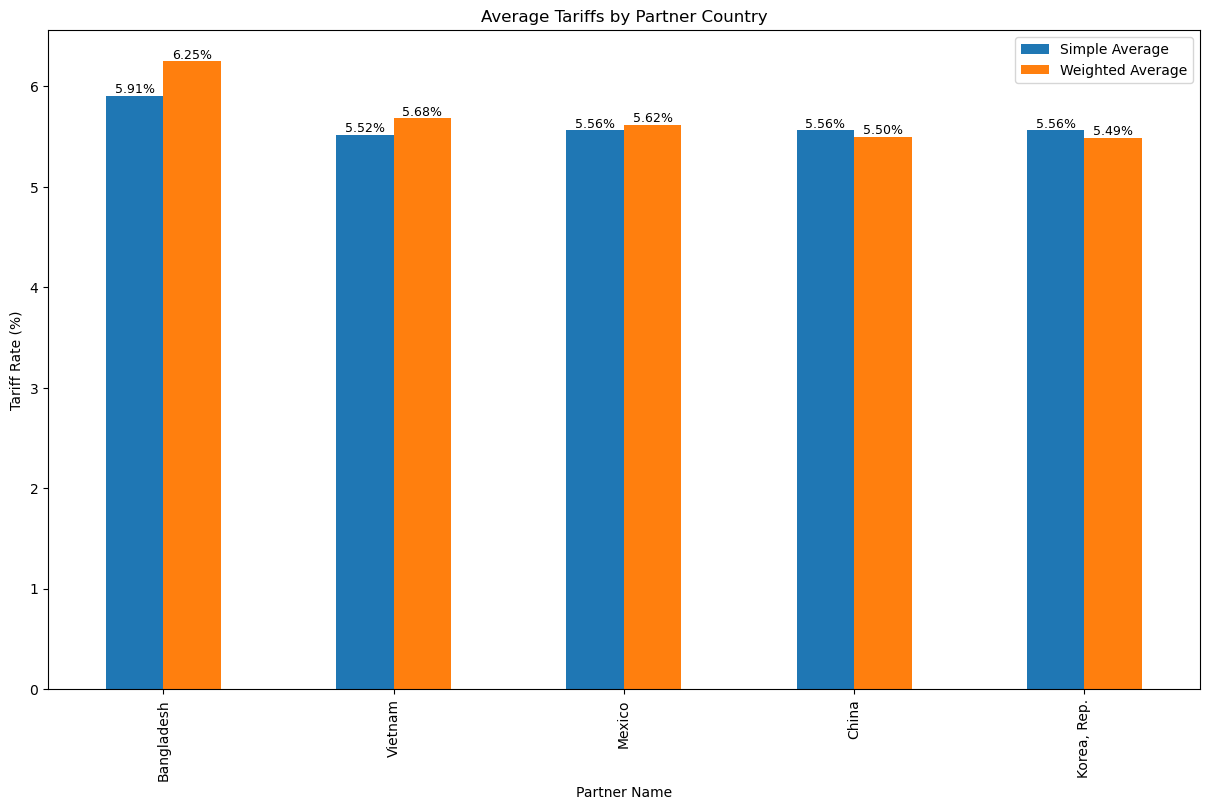

In [74]:
# 3. Partner Country-wise Tariff Comparison
plt.figure(figsize=(12,6))
partner_tariffs = tariff.groupby("Partner Name")[["Simple Average", "Weighted Average"]].mean().sort_values("Weighted Average", ascending=False)
ax = partner_tariffs.plot(kind="bar", figsize=(12,8))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}%", 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.title("Average Tariffs by Partner Country")
plt.ylabel("Tariff Rate (%)")
plt.show()

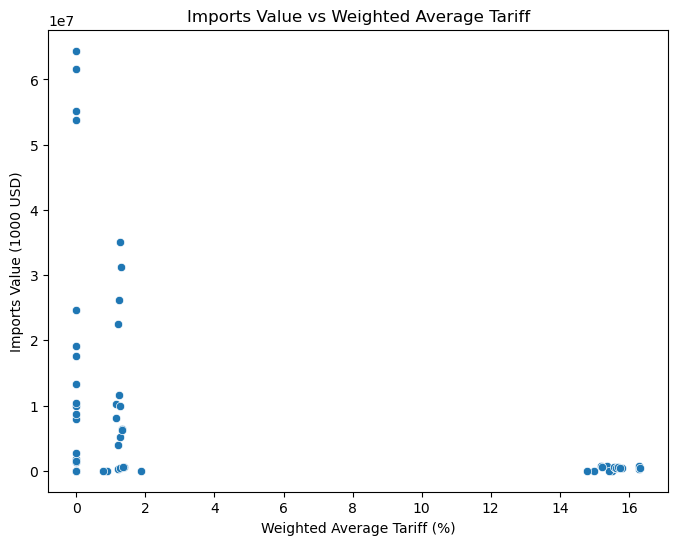

In [75]:
# 4. Imports vs Tariff (Correlation)
plt.figure(figsize=(8,6))
sns.scatterplot(data=tariff, x="Weighted Average", y="Imports Value in 1000 USD")
plt.title("Imports Value vs Weighted Average Tariff")
plt.xlabel("Weighted Average Tariff (%)")
plt.ylabel("Imports Value (1000 USD)")
plt.show()

### Clean economic_data

In [129]:
economic_data.info()
economic_data.head()

<class 'wbdata.client.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            20 non-null     object 
 1   date               20 non-null     object 
 2   gdp_per_capita     20 non-null     float64
 3   unemployment_rate  20 non-null     float64
 4   inflation_rate     20 non-null     float64
 5   exchange_rate      20 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


,country,date,gdp_per_capita,unemployment_rate,inflation_rate,exchange_rate
0,Bangladesh,2023,2551.017738,4.454,9.883503,106.309484
1,Bangladesh,2022,2716.485928,4.593,7.696954,91.745454
2,Bangladesh,2021,2482.849178,5.327,5.545654,85.083763
3,Bangladesh,2020,2248.850788,5.436,5.691075,84.871392
4,China,2023,12951.178240,4.670,0.234837,7.083998


In [131]:
# Rename date column to year
economic_data.rename(columns={"date": "year"}, inplace=True)

# Convert to numeric columns
numeric_cols = ["year", "gdp_per_capita", "unemployment_rate", "inflation_rate", "exchange_rate"]
economic_data[numeric_cols] = economic_data[numeric_cols].apply(pd.to_numeric, errors="coerce")

economic_data.info()

<class 'wbdata.client.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            20 non-null     object 
 1   year               20 non-null     int64  
 2   gdp_per_capita     20 non-null     float64
 3   unemployment_rate  20 non-null     float64
 4   inflation_rate     20 non-null     float64
 5   exchange_rate      20 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.1+ KB


In [132]:
economic_data.to_csv("final_economic_data.csv", index = False)

#### Visualization

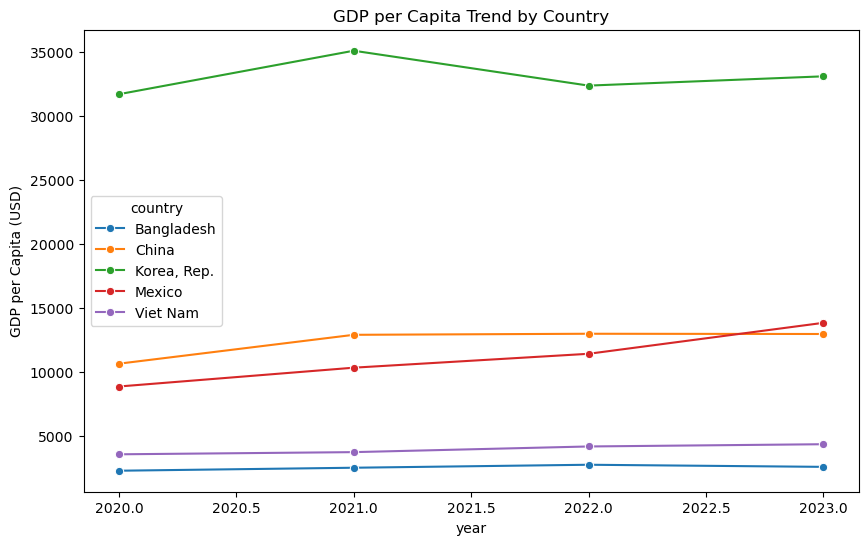

In [81]:
econ = pd.read_csv("final_economic_data.csv")
# 1. GDP per Capita Trend by Country
plt.figure(figsize=(10,6))
sns.lineplot(data=econ, x="year", y="gdp_per_capita", hue="country", marker="o")
plt.title("GDP per Capita Trend by Country")
plt.ylabel("GDP per Capita (USD)")
plt.show()

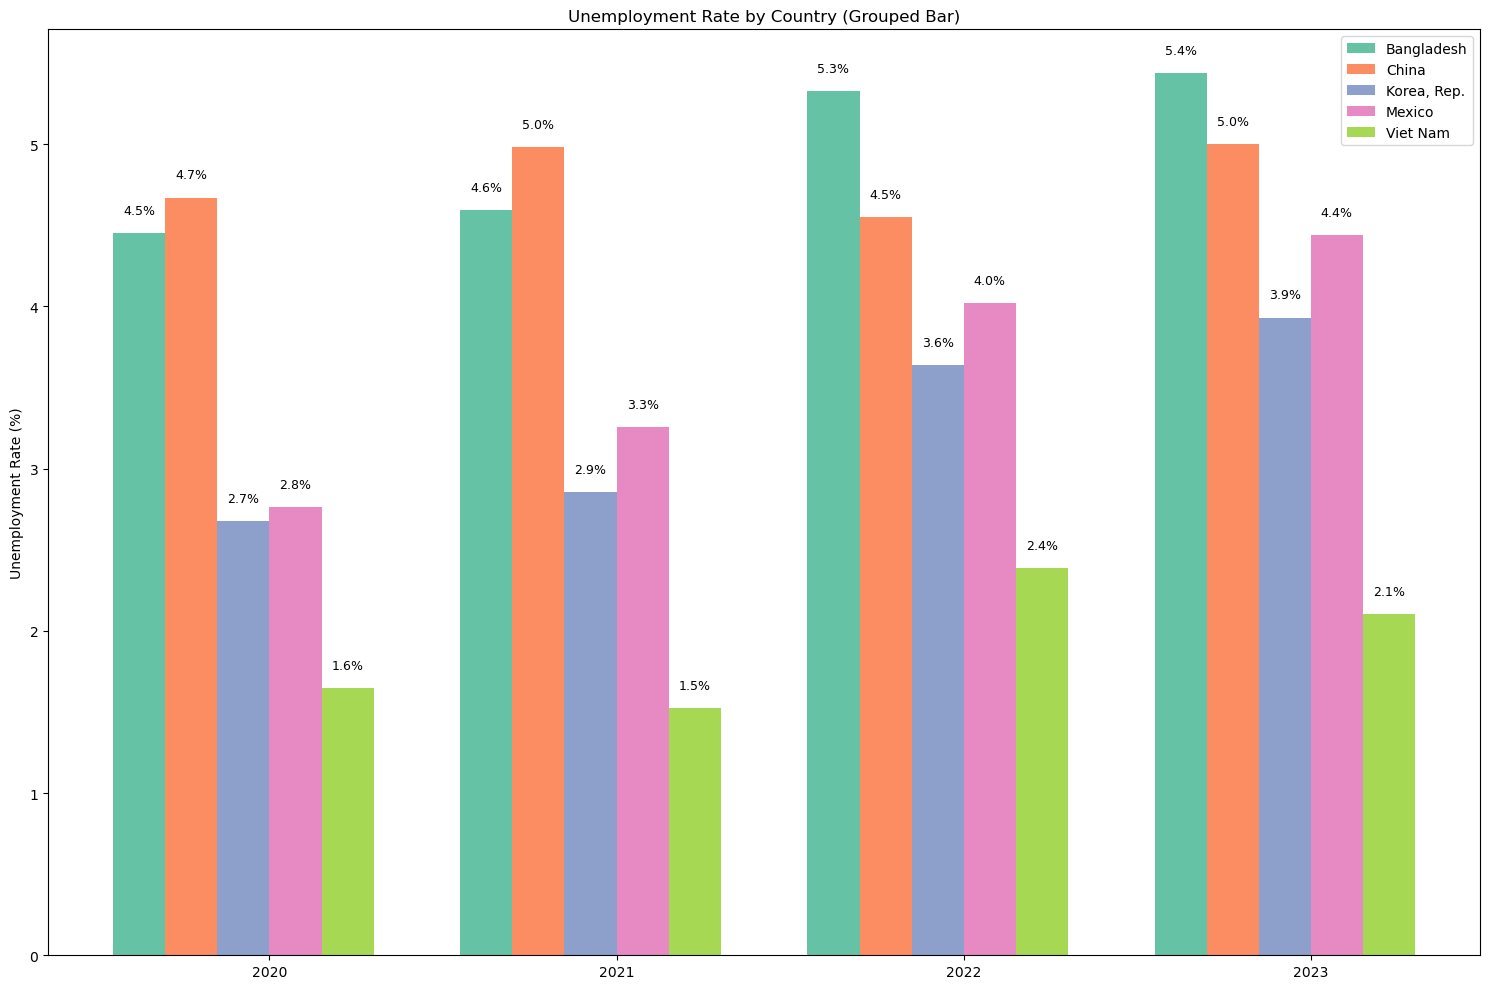

In [91]:
# 2. Unemployment Rate Trend
years = sorted(econ['year'].unique())
countries = econ['country'].unique()
bar_width = 0.15

plt.figure(figsize=(15,10))

# Choose a nice palette
palette = sns.color_palette("Set2", len(countries))

for i, (country, color) in enumerate(zip(countries, palette)):
    subset = econ[econ['country'] == country]
    bars = plt.bar(np.array(years) + i*bar_width, subset['unemployment_rate'], 
                   width=bar_width, label=country, color=color)
    
    # Add values on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f"{height:.1f}%", 
                 ha='center', va='bottom', fontsize=9)

plt.xticks(np.array(years) + bar_width*(len(countries)/2), years)
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate by Country (Grouped Bar)")
plt.legend()
plt.tight_layout()
plt.show()

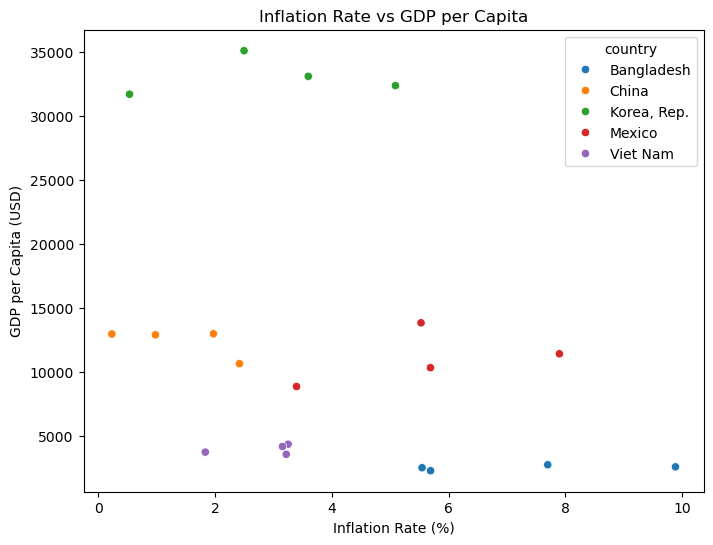

In [86]:
# 3. Inflation vs GDP (Correlation)
plt.figure(figsize=(8,6))
sns.scatterplot(data=econ, x="inflation_rate", y="gdp_per_capita", hue="country")
plt.title("Inflation Rate vs GDP per Capita")
plt.xlabel("Inflation Rate (%)")
plt.ylabel("GDP per Capita (USD)")
plt.show()

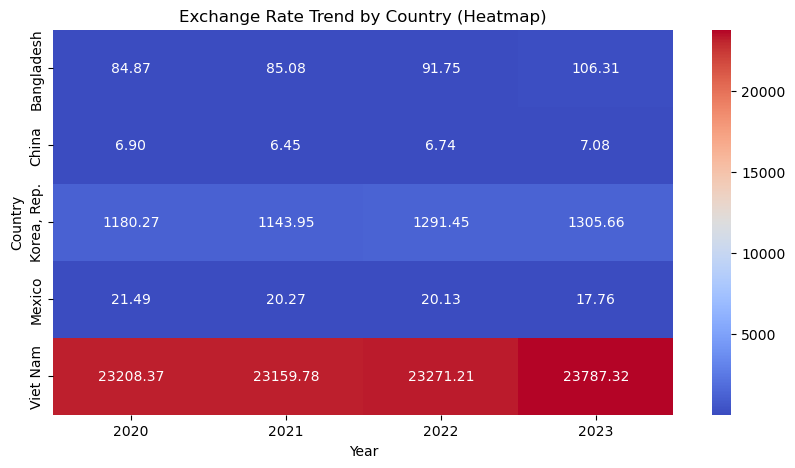

In [88]:
# 4. Exchange Rate Volatility
pivot = econ.pivot(index='country', columns='year', values='exchange_rate')

plt.figure(figsize=(10,5))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Exchange Rate Trend by Country (Heatmap)")
plt.ylabel("Country")
plt.xlabel("Year")
plt.show()